In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from datasets import load_dataset, load_from_disk
from datasets import concatenate_datasets
import pandas as pd
import numpy as np
from datasets import Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_location = "/content/drive/MyDrive/685 Final Project/Datasets/medmcqa"

In [ ]:
train_dataset = load_from_disk(f"{dataset_location}/train.hf")
test_dataset = load_from_disk(f"{dataset_location}/test.hf")
eval_dataset = load_from_disk(f"{dataset_location}/eval.hf")

In [ ]:
train_dataset

Dataset({
    features: ['id', 'question', 'opa', 'opb', 'opc', 'opd', 'cop', 'choice_type', 'exp', 'subject_name', 'topic_name'],
    num_rows: 182822
})

In [ ]:
set(eval_dataset['cop'])

{0, 1, 2, 3}

In [ ]:
train_df = pd.DataFrame(train_dataset)
train_df.head()

,id,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name,topic_name
0,e9ad821a-c438-4965-9f77-760819dfa155,Chronic urethral obstruction due to benign pri...,Hyperplasia,Hyperophy,Atrophy,Dyplasia,2,single,Chronic urethral obstruction because of urinar...,Anatomy,Urinary tract
1,e3d3c4e1-4fb2-45e7-9f88-247cc8f373b3,Which vitamin is supplied from only animal sou...,Vitamin C,Vitamin B7,Vitamin B12,Vitamin D,2,single,Ans. (c) Vitamin B12 Ref: Harrison's 19th ed. ...,Biochemistry,Vitamins and Minerals
2,5c38bea6-787a-44a9-b2df-88f4218ab914,All of the following are surgical options for ...,Adjustable gastric banding,Biliopancreatic diversion,Duodenal Switch,Roux en Y Duodenal By pass,3,multi,"Ans. is 'd' i.e., Roux en Y Duodenal Bypass Ba...",Surgery,Surgical Treatment Obesity
3,cdeedb04-fbe9-432c-937c-d53ac24475de,Following endaerectomy on the right common car...,Central aery of the retina,Infraorbital aery,Lacrimal aery,Nasociliary aretry,0,multi,The central aery of the retina is a branch of ...,Ophthalmology,None
4,dc6794a3-b108-47c5-8b1b-3b4931577249,Growth hormone has its effect on growth through?,Directly,IG1-1,Thyroxine,Intranuclear receptors,1,single,"Ans. is 'b' i.e., IGI-1GH has two major functi...",Physiology,None


In [ ]:
set(train_df['cop']) # Correct options

{0, 1, 2, 3}

In [ ]:
train_df[train_df['choice_type'] == 'multi']

,id,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name,topic_name
2,5c38bea6-787a-44a9-b2df-88f4218ab914,All of the following are surgical options for ...,Adjustable gastric banding,Biliopancreatic diversion,Duodenal Switch,Roux en Y Duodenal By pass,3,multi,"Ans. is 'd' i.e., Roux en Y Duodenal Bypass Ba...",Surgery,Surgical Treatment Obesity
3,cdeedb04-fbe9-432c-937c-d53ac24475de,Following endaerectomy on the right common car...,Central aery of the retina,Infraorbital aery,Lacrimal aery,Nasociliary aretry,0,multi,The central aery of the retina is a branch of ...,Ophthalmology,None
6,a83de6e4-9427-4480-b404-d96621ebb640,Abnormal vascular patterns seen with colposcop...,Punctation,Mosaicism,Satellite lesions,Atypical vessels,2,multi,"Abnormal vascular pattern include punctation, ...",Gynaecology & Obstetrics,None
11,e529be7c-f360-4dba-b313-7f3fc240697a,Which of the following statements are True/Fal...,"1, 2, 3 True & 4, 5 false","1, 3, 5 True & 2, 4 false","2, 4, 5 True & 1, 3 false","1, 2, 3, 4 True & 5 false",2,multi,Here statement 1 & 3 are wrong. It is actually...,Medicine,None
13,d64eabcf-da66-438f-a53f-7137d3bba9dd,True regarding lag phase is?,Time taken to adpt in the new environment,Growth occurs exponentially,The plateau in lag phase is due to cell death,It is the 2nd phase in bacterial growth curve,0,multi,Lag phase: Immediately following the seeding o...,Microbiology,general microbiology
...,...,...,...,...,...,...,...,...,...,...,...
182809,865375da-5bbd-43a3-b921-7959f2c6c5c7,A patient with psoriasis was staed on systemic...,Bacterial infection,Erythrodermic Psoriasis,Drug induced reaction,Pustular psoriasis,3,multi,Patient of psoriasis on withdrawal of systemic...,Dental,Psoriasis
182811,c4587b26-9ba2-44e0-9095-655ac8e9e1b6,Which of the following indicates anticipated d...,Age >30 yrs,BMI >20,Beard,None of the above,2,multi,Predicting difficulty in mask ventilation Mask...,Anaesthesia,Anaesthesia Q Bank
182818,fa6b40a1-459a-401c-96e7-fac5608e7744,Inferior Rib notching is seen in all except?,Coarctation of aoa,Classical blalock tausing operation,SVC obstruction,Neurofibromatosis,3,multi,Answer is D (Neurofibromatosis) Neurofibromato...,Medicine,None
182819,4ecebffe-72f6-4988-8d64-738e43ad6086,Which is false regarding cryptococcus neoformans?,Grows at 5degC and 37degC,It has 4 serotypes,Urease negative,Causes superficial skin infection,2,multi,"Ans. is 'c' i e., Urease negative Cryptococcus...",Microbiology,None


In [ ]:
train_df.isnull().sum() # Checking for null

id                  0
question            0
opa                 0
opb                 0
opc                 0
opd                 0
cop                 0
choice_type         0
exp             21953
subject_name        0
topic_name      95613
dtype: int64

In [ ]:
train_df.columns

Index(['id', 'question', 'opa', 'opb', 'opc', 'opd', 'cop', 'choice_type',
       'exp', 'subject_name', 'topic_name'],
      dtype='object')

In [ ]:
def make_into_prompt(row):

  cop = chr(row['cop'] + 65)

  op_a = row['opa']
  op_b = row['opb']
  op_c = row['opc']
  op_d = row['opd']

  question = '{}\nOptions:\nA. {}\nB. {}\nC. {}\nD. {}\n'.format(row['question'], op_a, op_b, op_c, op_d)
  answer = cop

  ## Removed Answer from the prompt. Just kept 'Answer: ' word.
  ## The answer will be the y-value for the classification problem.
  prompt = f"""
    Question:
    {question}
    [INST] Solve this Multiple Choice Question and provide the correct option out of four options(A,B,C,D) as the answer. [/INST]
    Answer: </s>"""

  #print('Prompt:',prompt)
  return prompt

In [ ]:
train_smol = train_df[:100]
train_smol

,id,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name,topic_name
0,e9ad821a-c438-4965-9f77-760819dfa155,Chronic urethral obstruction due to benign pri...,Hyperplasia,Hyperophy,Atrophy,Dyplasia,2,single,Chronic urethral obstruction because of urinar...,Anatomy,Urinary tract
1,e3d3c4e1-4fb2-45e7-9f88-247cc8f373b3,Which vitamin is supplied from only animal sou...,Vitamin C,Vitamin B7,Vitamin B12,Vitamin D,2,single,Ans. (c) Vitamin B12 Ref: Harrison's 19th ed. ...,Biochemistry,Vitamins and Minerals
2,5c38bea6-787a-44a9-b2df-88f4218ab914,All of the following are surgical options for ...,Adjustable gastric banding,Biliopancreatic diversion,Duodenal Switch,Roux en Y Duodenal By pass,3,multi,"Ans. is 'd' i.e., Roux en Y Duodenal Bypass Ba...",Surgery,Surgical Treatment Obesity
3,cdeedb04-fbe9-432c-937c-d53ac24475de,Following endaerectomy on the right common car...,Central aery of the retina,Infraorbital aery,Lacrimal aery,Nasociliary aretry,0,multi,The central aery of the retina is a branch of ...,Ophthalmology,None
4,dc6794a3-b108-47c5-8b1b-3b4931577249,Growth hormone has its effect on growth through?,Directly,IG1-1,Thyroxine,Intranuclear receptors,1,single,"Ans. is 'b' i.e., IGI-1GH has two major functi...",Physiology,None
...,...,...,...,...,...,...,...,...,...,...,...
95,8705fb60-c237-4804-a9cf-8adbb631bcd3,A Dentin 'Primer'?,Etches the dentin,It increases the surface energy & wets the den...,Removes the smear layer,Conditions the dentin,1,single,None,Dental,None
96,d0b35238-78a6-454d-9bc9-65180db85bbb,Which of the following hormonal activity is ex...,LH surge,FSH surge,Progestrone surge,Estrogen surge,0,single,Ovulation occurs due to the effect of increase...,Physiology,None
97,e2e8a056-13c0-457f-945f-da4fdb9afbd6,Following are fibrous joints :,Pubic symphysis,Fronto parietal suture,Manubrio sternal joint,Inf. radio ulnar joint,1,single,B. i.e. Frontoparietal sutureSkull sutures (ex...,Anatomy,None
98,df59eac7-87b1-4805-9c47-0caf96a3450d,For exhumation the order should be passed by -,Chief judicial magistrate,Executive magistrate,Police officer,Session judge,1,single,"The body is exhumed only when, there is writte...",Forensic Medicine,None


In [ ]:
train_smol.apply(make_into_prompt, axis=1) # Converting questions to prompts

0     \n    Question:\n    Chronic urethral obstruct...
1     \n    Question:\n    Which vitamin is supplied...
2     \n    Question:\n    All of the following are ...
3     \n    Question:\n    Following endaerectomy on...
4     \n    Question:\n    Growth hormone has its ef...
                            ...                        
95    \n    Question:\n    A Dentin 'Primer'?\nOptio...
96    \n    Question:\n    Which of the following ho...
97    \n    Question:\n    Following are fibrous joi...
98    \n    Question:\n    For exhumation the order ...
99    \n    Question:\n    The radiograph of a 32 ye...
Length: 100, dtype: object

In [ ]:
train_df['prompt'] = train_df.apply(make_into_prompt, axis=1)

In [ ]:
eval_df = pd.DataFrame(eval_dataset)
eval_df['prompt'] = eval_df.apply(make_into_prompt, axis=1)


In [ ]:
test_df = pd.DataFrame(test_dataset)
test_df['prompt'] = test_df.apply(make_into_prompt, axis=1)


In [ ]:
eval_df.subject_name.value_counts()

subject_name
Dental                          1318
Surgery                          369
Pathology                        337
Medicine                         295
Pharmacology                     243
Anatomy                          234
Pediatrics                       234
Gynaecology & Obstetrics         224
Physiology                       171
Biochemistry                     171
Social & Preventive Medicine     129
Microbiology                     122
Radiology                         69
Forensic Medicine                 67
Ophthalmology                     58
ENT                               53
Anaesthesia                       34
Orthopaedics                      20
Skin                              17
Psychiatry                        16
Unknown                            2
Name: count, dtype: int64

In [ ]:
eval_df.cop.value_counts()

cop
0    1348
1    1085
2     925
3     825
Name: count, dtype: int64

In [ ]:
train_df.cop.value_counts()

cop
0    53591
1    47826
2    42442
3    38963
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ["Option A", "Option B","Option C","Option D",]
sizes = train_df.cop.value_counts()

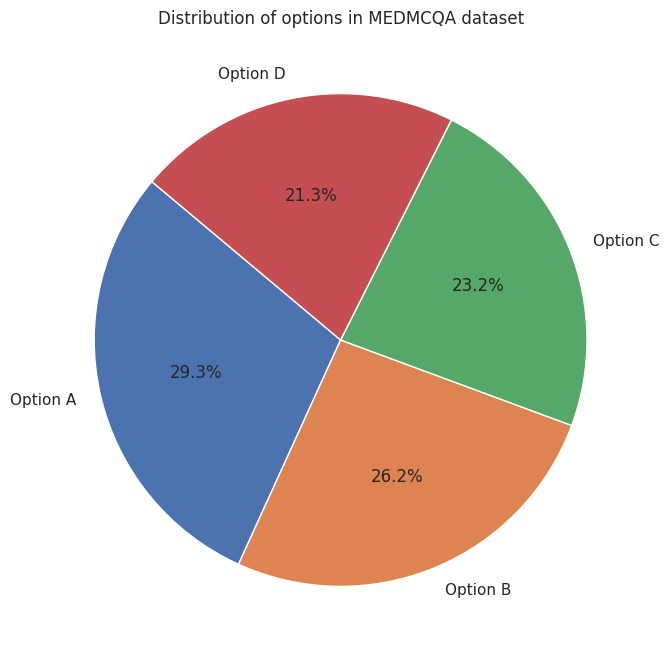

In [ ]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

plt.figure(figsize=(8, 8)) # Optional: sets the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Optional: adding a title
plt.title('Distribution of options in MEDMCQA dataset')

# Display the pie chart
plt.show()

In [ ]:
def one_hot_encode(label, num_classes):
    one_hot_encoded = np.zeros(num_classes)
    one_hot_encoded[label] = 1
    return one_hot_encoded

num_classes = 4

In [ ]:
train_smol['cop'].apply(lambda x: one_hot_encode(x, num_classes)) # Applying one hot encoding

0     [0.0, 0.0, 1.0, 0.0]
1     [0.0, 0.0, 1.0, 0.0]
2     [0.0, 0.0, 0.0, 1.0]
3     [1.0, 0.0, 0.0, 0.0]
4     [0.0, 1.0, 0.0, 0.0]
              ...         
95    [0.0, 1.0, 0.0, 0.0]
96    [1.0, 0.0, 0.0, 0.0]
97    [0.0, 1.0, 0.0, 0.0]
98    [0.0, 1.0, 0.0, 0.0]
99    [1.0, 0.0, 0.0, 0.0]
Name: cop, Length: 100, dtype: object

In [ ]:
train_df['label_one_hot'] = train_df['cop'].apply(lambda x: one_hot_encode(x, num_classes))
eval_df['label_one_hot'] = eval_df['cop'].apply(lambda x: one_hot_encode(x, num_classes))
test_df['label_one_hot'] = test_df['cop'].apply(lambda x: one_hot_encode(x, num_classes))

In [ ]:
dataset_location = "/content/drive/MyDrive/685 Final Project/Datasets/medmcqa-prompts"

In [ ]:
train_df_mini = train_df[:20000]

In [ ]:
train_df['cop'].value_counts()/len(train_df['cop'])

cop
0    0.293132
1    0.261599
2    0.232149
3    0.213120
Name: count, dtype: float64

In [ ]:
train_df['cop'][:20000].value_counts()/len(train_df[:20000]['cop'])

cop
0    0.29145
1    0.25920
2    0.23615
3    0.21320
Name: count, dtype: float64

In [ ]:
eval_df['cop'][:20000].value_counts()/len(eval_df[:20000]['cop'])

cop
0    0.322257
1    0.259383
2    0.221133
3    0.197227
Name: count, dtype: float64

In [ ]:
eval_df[:2000]['cop'].value_counts()/len(eval_df[:2000]['cop'])

cop
0    0.3185
1    0.2625
2    0.2225
3    0.1965
Name: count, dtype: float64

In [ ]:
# train_50_80 = pd.DataFrame(train_dataset_mini.select(range(10000, 16000)))

In [ ]:
# train_0_50 = pd.DataFrame(train_dataset_mini.select(range(0, 10000)))


In [ ]:
# train_50_80['cop'].value_counts()/len(train_50_80['cop'])

In [ ]:
# train_50_80.prompt.apply(len).describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [ ]:
# train_0_50['cop'].value_counts()/len(train_0_50['cop'])

In [ ]:
# train_0_50.prompt.apply(len).describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [ ]:
train_df['cop'].value_counts()/len(train_df)

cop
0    0.293132
1    0.261599
2    0.232149
3    0.213120
Name: count, dtype: float64

In [ ]:
train_df_mini['cop'].value_counts()/len(train_df_mini['cop'])

cop
0    0.29145
1    0.25920
2    0.23615
3    0.21320
Name: count, dtype: float64

In [ ]:
train_df_micro = train_df[:2000]
eval_df_micro = eval_df[:500]
test_df_micro = test_df[:500]

In [ ]:
eval_df_mini = eval_df[:2000]
test_df_mini = test_df[:2000]

In [ ]:
train_df_mini

,id,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name,topic_name,prompt,label_one_hot
0,e9ad821a-c438-4965-9f77-760819dfa155,Chronic urethral obstruction due to benign pri...,Hyperplasia,Hyperophy,Atrophy,Dyplasia,2,single,Chronic urethral obstruction because of urinar...,Anatomy,Urinary tract,\n Question:\n Chronic urethral obstruct...,"[0.0, 0.0, 1.0, 0.0]"
1,e3d3c4e1-4fb2-45e7-9f88-247cc8f373b3,Which vitamin is supplied from only animal sou...,Vitamin C,Vitamin B7,Vitamin B12,Vitamin D,2,single,Ans. (c) Vitamin B12 Ref: Harrison's 19th ed. ...,Biochemistry,Vitamins and Minerals,\n Question:\n Which vitamin is supplied...,"[0.0, 0.0, 1.0, 0.0]"
2,5c38bea6-787a-44a9-b2df-88f4218ab914,All of the following are surgical options for ...,Adjustable gastric banding,Biliopancreatic diversion,Duodenal Switch,Roux en Y Duodenal By pass,3,multi,"Ans. is 'd' i.e., Roux en Y Duodenal Bypass Ba...",Surgery,Surgical Treatment Obesity,\n Question:\n All of the following are ...,"[0.0, 0.0, 0.0, 1.0]"
3,cdeedb04-fbe9-432c-937c-d53ac24475de,Following endaerectomy on the right common car...,Central aery of the retina,Infraorbital aery,Lacrimal aery,Nasociliary aretry,0,multi,The central aery of the retina is a branch of ...,Ophthalmology,None,\n Question:\n Following endaerectomy on...,"[1.0, 0.0, 0.0, 0.0]"
4,dc6794a3-b108-47c5-8b1b-3b4931577249,Growth hormone has its effect on growth through?,Directly,IG1-1,Thyroxine,Intranuclear receptors,1,single,"Ans. is 'b' i.e., IGI-1GH has two major functi...",Physiology,None,\n Question:\n Growth hormone has its ef...,"[0.0, 1.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,c8b9519c-f713-4fc4-ac51-6f1f6da5312c,All of the following are moality indicators ex...,Disability adjusted life years (DALY),Years of potential life lost (YPLL),Life Expectancy,Case fatality rate,0,multi,Disability adjusted life years (DALY) is a dis...,Social & Preventive Medicine,"Disease Causation, Measurements, Milestones",\n Question:\n All of the following are ...,"[1.0, 0.0, 0.0, 0.0]"
19996,78325813-54dc-497a-983b-bfc61f1c7a82,Modifiable risk factors for hypertension is ?,Genetic factors,Age,Sex,Obesity,3,single,"Ans. is 'd' i.e., Obesity Risk factors for hyp...",Social & Preventive Medicine,Non-Communicable Diseases,\n Question:\n Modifiable risk factors f...,"[0.0, 0.0, 0.0, 1.0]"
19997,3dcd483d-0bcc-421f-9e99-ac0445131194,which of the following is true regarding compe...,potency increases,Km decreases,efficacy and Vmax no change,ED50 decreases,2,multi,COMPETITIVE Reversible ANTAGONISM 1.Same recep...,Pharmacology,All India exam,\n Question:\n which of the following is...,"[0.0, 0.0, 1.0, 0.0]"
19998,1c0c9192-04d6-4417-8ff9-43808e0a7a0f,True about Pendred syndrome is:,Diffuse colloid goitre,Mental retardation,Bilateral sensory neural deafness,All of the above,3,multi,"Ans. D. All of the abovePendred syndrome, a di...",Pediatrics,Genetics And Genetic Disorders,\n Question:\n True about Pendred syndro...,"[0.0, 0.0, 0.0, 1.0]"


In [ ]:
#Saving the dataframes


# train_df_mini.to_csv(f'{dataset_location}/train_mini_prompts.csv',index=False)
# train_df_micro.to_csv(f'{dataset_location}/train_micro_prompts.csv',index=False)
# eval_df_micro.to_csv(f'{dataset_location}/eval_micro_prompts.csv',index=False)
# test_df_micro.to_csv(f'{dataset_location}/test_micro_prompts.csv',index=False)
eval_df_mini.to_csv(f'{dataset_location}/eval_mini_prompts.csv',index=False)
test_df_mini.to_csv(f'{dataset_location}/test_mini_prompts.csv',index=False)



In [ ]:
# train_df.to_csv(f'{dataset_location}/train_prompts.csv',index=False)
# eval_df.to_csv(f'{dataset_location}/eval_prompts.csv',index=False)
# test_df.to_csv(f'{dataset_location}/test_prompts.csv',index=False)

In [ ]:
# train_hf = Dataset.from_pandas(train_df)
# eval_hf = Dataset.from_pandas(eval_df)
# test_hf = Dataset.from_pandas(test_df)

# train_hf_mini = Dataset.from_pandas(train_df_mini)
# train_hf_micro = Dataset.from_pandas(train_df_micro)
# eval_hf_micro = Dataset.from_pandas(eval_df_micro)
# test_hf_micro = Dataset.from_pandas(test_df_micro)

eval_hf_mini = Dataset.from_pandas(eval_df_mini)
test_hf_mini = Dataset.from_pandas(test_df_mini)
# Dataset.from_pandas(eval_df)
# Dataset.from_pandas(eval_df)

In [ ]:
# train_hf_mini.save_to_disk(f"{dataset_location}/train_prompts_mini.hf")
# train_hf_micro.save_to_disk(f"{dataset_location}/train_prompts_micro.hf")
# eval_hf_micro.save_to_disk(f"{dataset_location}/eval_prompts_micro.hf")
# test_hf_micro.save_to_disk(f"{dataset_location}/test_prompts_micro.hf")

eval_hf_mini.save_to_disk(f"{dataset_location}/eval_prompts_mini.hf")
test_hf_mini.save_to_disk(f"{dataset_location}/test_prompts_mini.hf")



Saving the dataset (0/1 shards):   0%|          | 0/2000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
# # train_hf.save_to_disk(f"{dataset_location}/train_prompts.hf")
# eval_hf.save_to_disk(f"{dataset_location}/eval_prompts.hf")
# test_hf.save_to_disk(f"{dataset_location}/test_prompts.hf")

Saving the dataset (0/1 shards):   0%|          | 0/4183 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/6150 [00:00<?, ? examples/s]

# Prompts for NEXT WORD ANSWER

In [ ]:
def make_into_prompt_next_word(row):

  cop = chr(row['cop'] + 65)

  op_a = row['opa']
  op_b = row['opb']
  op_c = row['opc']
  op_d = row['opd']

  question = '{}\nOptions:\nA. {}\nB. {}\nC. {}\nD. {}\n'.format(row['question'], op_a, op_b, op_c, op_d)
  answer = cop

  ## Removed Answer from the prompt. Just kept 'Answer: ' word.
  ## The answer will be the y-value for the classification problem.
  prompt = f"""
    Question:
    {question}
    [INST] Solve this Multiple Choice Question and provide the correct option out of four options(A,B,C,D) as the answer. [/INST]
    Answer: {answer} </s>"""

  #print('Prompt:',prompt)
  return prompt

In [ ]:
dataset_location = "/content/drive/MyDrive/685 Final Project/Datasets/medmcqa"


In [ ]:
train_dataset = load_from_disk(f"{dataset_location}/train.hf")
test_dataset = load_from_disk(f"{dataset_location}/test.hf")
eval_dataset = load_from_disk(f"{dataset_location}/eval.hf")

In [ ]:
train_dataset

Dataset({
    features: ['id', 'question', 'opa', 'opb', 'opc', 'opd', 'cop', 'choice_type', 'exp', 'subject_name', 'topic_name'],
    num_rows: 182822
})

In [ ]:
set(eval_dataset['cop'])

{0, 1, 2, 3}

In [ ]:
train_smol = train_df[:100]

In [ ]:
train_smol.apply(make_into_prompt_next_word, axis=1)

0     \n    Question:\n    Chronic urethral obstruct...
1     \n    Question:\n    Which vitamin is supplied...
2     \n    Question:\n    All of the following are ...
3     \n    Question:\n    Following endaerectomy on...
4     \n    Question:\n    Growth hormone has its ef...
                            ...                        
95    \n    Question:\n    A Dentin 'Primer'?\nOptio...
96    \n    Question:\n    Which of the following ho...
97    \n    Question:\n    Following are fibrous joi...
98    \n    Question:\n    For exhumation the order ...
99    \n    Question:\n    The radiograph of a 32 ye...
Length: 100, dtype: object

In [ ]:
train_df = pd.DataFrame(train_dataset)
train_df['prompt'] = train_df.apply(make_into_prompt_next_word, axis=1)
train_df['prompt_inf'] = train_df.apply(make_into_prompt, axis=1)


eval_df = pd.DataFrame(eval_dataset)
eval_df['prompt'] = eval_df.apply(make_into_prompt_next_word, axis=1)
eval_df['prompt_inf'] = eval_df.apply(make_into_prompt, axis=1)


test_df = pd.DataFrame(test_dataset)
test_df['prompt'] = test_df.apply(make_into_prompt_next_word, axis=1)
test_df['prompt_inf'] = test_df.apply(make_into_prompt, axis=1)


In [ ]:
eval_df

,id,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name,topic_name,prompt,prompt_inf
0,45258d3d-b974-44dd-a161-c3fccbdadd88,Which of the following is not true for myelina...,Impulse through myelinated fibers is slower th...,Membrane currents are generated at nodes of Ra...,Saltatory conduction of impulses is seen,Local anesthesia is effective only when the ne...,0,multi,None,Physiology,None,\n Question:\n Which of the following is...,\n Question:\n Which of the following is...
1,b944ada9-d776-4c2a-9180-3ae5f393f72d,Which of the following is not true about glome...,The oncotic pressure of the fluid leaving the ...,Glucose concentration in the capillaries is th...,Constriction of afferent aeriole decreases the...,Hematocrit of the fluid leaving the capillarie...,0,multi,Ans-a. The oncotic pressure of the fluid leavi...,Physiology,None,\n Question:\n Which of the following is...,\n Question:\n Which of the following is...
2,b64a9cd7-d076-4c55-8be1-f9c44fece6cc,A 29 yrs old woman with a pregnancy of 17 week...,No test is required now as her age is below 35...,Ultra sound at this point of time will definit...,Amniotic fluid samples plus chromosomal analys...,blood screening at this point of time will cle...,2,single,None,Medicine,None,\n Question:\n A 29 yrs old woman with a...,\n Question:\n A 29 yrs old woman with a...
3,c6365cce-507c-40f6-90a2-46b867f47b6e,Axonal transport is:,Antegrade,Retrograde,Antegrade and retrograde,None,2,multi,Fast anterograde (400 mm/day) transport occurs...,Physiology,None,\n Question:\n Axonal transport is:\nOpt...,\n Question:\n Axonal transport is:\nOpt...
4,72c1c5e0-b64f-4eef-bf22-ecfb60c5c19c,Low insulin to glucagon ratio is seen in all o...,Glycogen synthesis,Glycogen breakdown,Gluconeogenesis,Ketogenesis,0,multi,Answer- A. Glycogen synthesisLow insulin to gl...,Biochemistry,None,\n Question:\n Low insulin to glucagon r...,\n Question:\n Low insulin to glucagon r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,51234bc7-9170-45cc-8494-837fe23af441,A study is to be conducted with regards to the...,Case control,Prospective coho,Longitudinal study,Ambispective,0,single,Ans. A. Since there is a comparison between fa...,Social & Preventive Medicine,None,\n Question:\n A study is to be conducte...,\n Question:\n A study is to be conducte...
4179,b0a05a95-cb2d-4ec4-9e19-c25742e18221,APGAR acronym stands for?,"Activity, pulse pressure, grimace, appearance,...","Appearance, pressure, grimace, MAP, hea rate","Appearance, pressure, grimace, appearance, rat...","Appearance, pulse, grimace, activity, respiration",3,single,0 (Points) 1 2 Appearance Blue or pale all ove...,Pediatrics,AIIMS 2017,\n Question:\n APGAR acronym stands for?...,\n Question:\n APGAR acronym stands for?...
4180,f07a7a11-ae84-4843-a8a2-9f77447fb954,Most commonly implicated drug for acute liver ...,Paracetamol,Valproate,Warfarin,Tetracyclines,0,single,Ans. A. Paracetamol Acute liver failure after ...,Pharmacology,None,\n Question:\n Most commonly implicated ...,\n Question:\n Most commonly implicated ...
4181,5a5dcbce-041f-45ee-8a1d-2ec6b23d5f82,A 9 year old boy has steroid dependent nephrot...,Longterm frusemide with enalapril,Cyclophosphamide,Intravenous immunoglobulin,Intravenous pulse corticosteroids,1,multi,If a steroid dependent patient develops severe...,Pediatrics,None,\n Question:\n A 9 year old boy has ster...,\n Question:\n A 9 year old boy has ster...


In [ ]:
# train_df['label_one_hot'] = train_df['cop'].apply(lambda x: one_hot_encode(x, num_classes))
# eval_df['label_one_hot'] = eval_df['cop'].apply(lambda x: one_hot_encode(x, num_classes))
# test_df['label_one_hot'] = test_df['cop'].apply(lambda x: one_hot_encode(x, num_classes))

In [ ]:
dataset_location = "/content/drive/MyDrive/685 Final Project/Datasets/medmcqa-prompts-nextword"

In [ ]:
train_df_mini = train_df[:20000]
eval_df_mini = eval_df[:2000]
test_df_mini = test_df[:2000]


In [ ]:
train_df_micro = train_df[:2000]
eval_df_micro = eval_df[:500]
test_df_micro = test_df[:500]

In [ ]:
dataset_location

'/content/drive/MyDrive/685 Final Project/Datasets/medmcqa-prompts-nextword'

In [ ]:
train_df_mini.to_csv(f'{dataset_location}/train_mini_prompts.csv',index=False)
train_df_micro.to_csv(f'{dataset_location}/train_micro_prompts.csv',index=False)
eval_df_micro.to_csv(f'{dataset_location}/eval_micro_prompts.csv',index=False)
test_df_micro.to_csv(f'{dataset_location}/test_micro_prompts.csv',index=False)
eval_df_mini.to_csv(f'{dataset_location}/eval_mini_prompts.csv',index=False)
test_df_mini.to_csv(f'{dataset_location}/test_mini_prompts.csv',index=False)



In [ ]:
train_df.to_csv(f'{dataset_location}/train_prompts.csv',index=False)
eval_df.to_csv(f'{dataset_location}/eval_prompts.csv',index=False)
test_df.to_csv(f'{dataset_location}/test_prompts.csv',index=False)

In [ ]:
train_hf = Dataset.from_pandas(train_df)
eval_hf = Dataset.from_pandas(eval_df)
test_hf = Dataset.from_pandas(test_df)

train_hf_mini = Dataset.from_pandas(train_df_mini)
eval_hf_mini = Dataset.from_pandas(eval_df_mini)
test_hf_mini = Dataset.from_pandas(test_df_mini)

train_hf_micro = Dataset.from_pandas(train_df_micro)
eval_hf_micro = Dataset.from_pandas(eval_df_micro)
test_hf_micro = Dataset.from_pandas(test_df_micro)


# Dataset.from_pandas(eval_df)
# Dataset.from_pandas(eval_df)

In [ ]:
train_hf_mini.save_to_disk(f"{dataset_location}/train_prompts_mini.hf")
eval_hf_mini.save_to_disk(f"{dataset_location}/eval_prompts_mini.hf")
test_hf_mini.save_to_disk(f"{dataset_location}/test_prompts_mini.hf")

train_hf_micro.save_to_disk(f"{dataset_location}/train_prompts_micro.hf")
eval_hf_micro.save_to_disk(f"{dataset_location}/eval_prompts_micro.hf")
test_hf_micro.save_to_disk(f"{dataset_location}/test_prompts_micro.hf")




Saving the dataset (0/1 shards):   0%|          | 0/20000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/500 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
train_hf.save_to_disk(f"{dataset_location}/train_prompts.hf")
eval_hf.save_to_disk(f"{dataset_location}/eval_prompts.hf")
test_hf.save_to_disk(f"{dataset_location}/test_prompts.hf")

Saving the dataset (0/1 shards):   0%|          | 0/182822 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/4183 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/6150 [00:00<?, ? examples/s]